# Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# DataFrame / Missing Value

In [2]:
data = pd.read_csv("nepal-earthquake-severity-index-latest (1).csv")
data

,P_CODE,VDC_NAME,DISTRICT,REGION,Hazard (Intensity),Exposure,Housing,Poverty,Vulnerability,Severity,Severity Normalized,Severity category
0,C-BAG-27-031,KathmanduN.P.,Kathmandu,Central,2.17,10.00,8.86,1.82,5.34,4.88,10.0000,Highest
1,C-BAG-25-027,LalitpurN.P.,Lalitpur,Central,1.72,2.26,8.40,0.82,4.61,2.62,5.3707,Highest
2,C-NAR-35-005,BharatpurN. P.,Chitawan,Central,2.21,1.47,5.38,2.53,3.96,2.34,4.8083,Highest
3,C-BAG-26-012,MadhyapurThimiN.P.,Bhaktapur,Central,2.45,0.85,8.23,0.89,4.56,2.12,4.3447,Highest
4,C-BAG-27-028,Jorpati,Kathmandu,Central,1.91,0.87,8.86,1.82,5.34,2.07,4.2407,Highest
...,...,...,...,...,...,...,...,...,...,...,...,...
3980,F-SET-69-076,Khaptad National Par,Achham,Far-Western,0.00,0.00,8.45,9.21,8.83,0.00,0.0000,Lowest
3981,F-SET-70-052,Khaptad National Park,Doti,Far-Western,0.00,0.00,8.77,8.26,8.52,0.00,0.0000,Lowest
3982,M-BHE-58-033,Royal Bardiya Nation,Bardiya,Mid-Western,0.00,0.00,4.64,4.82,4.73,0.00,0.0000,Lowest
3983,W-LUM-48-075,Royal Chitawan Natio,Nawalparasi,Western,0.84,0.00,5.61,3.51,4.56,0.00,0.0000,Lowest


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hazard (Intensity),3985.0,0.320537,0.779937,0.00,0.0000,0.0100,0.1300,10.00
Exposure,3985.0,0.067493,0.187551,0.00,0.0300,0.0500,0.0700,10.00
Housing,3985.0,5.706522,1.953037,1.17,4.6400,5.6100,6.8500,9.94
Poverty,3985.0,5.481854,2.270975,0.00,3.3300,5.6200,7.3500,10.00
Vulnerability,3985.0,5.594635,1.450817,1.62,4.5900,5.5500,6.6600,8.83
Severity,3985.0,0.248720,0.298756,0.00,0.0500,0.1400,0.3600,4.88
Severity Normalized,3985.0,0.510221,0.612652,0.00,0.0941,0.2862,0.7448,10.00


In [4]:
data.isnull().sum()

P_CODE                 0
VDC_NAME               0
DISTRICT               0
REGION                 0
Hazard (Intensity)     0
Exposure               0
Housing                0
Poverty                0
Vulnerability          0
Severity               0
Severity Normalized    0
Severity category      0
dtype: int64

In [5]:
data.duplicated().sum()

0

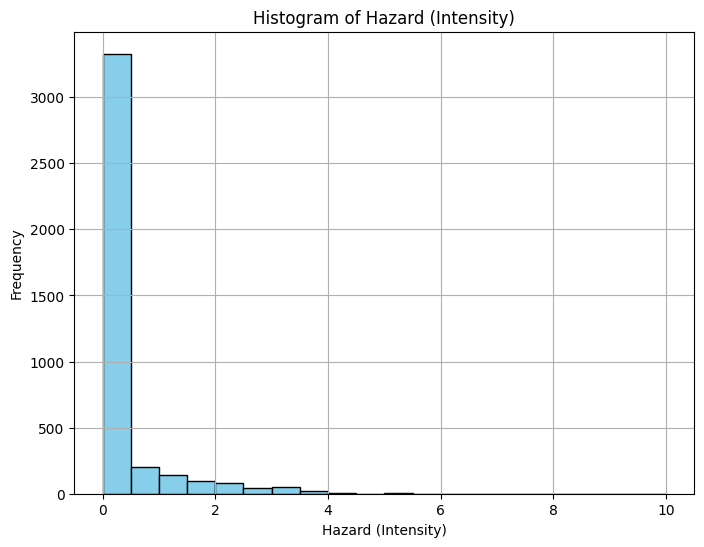

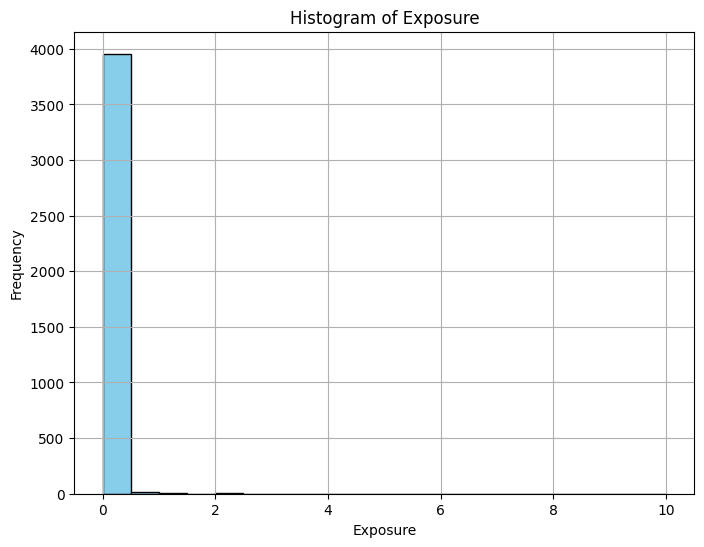

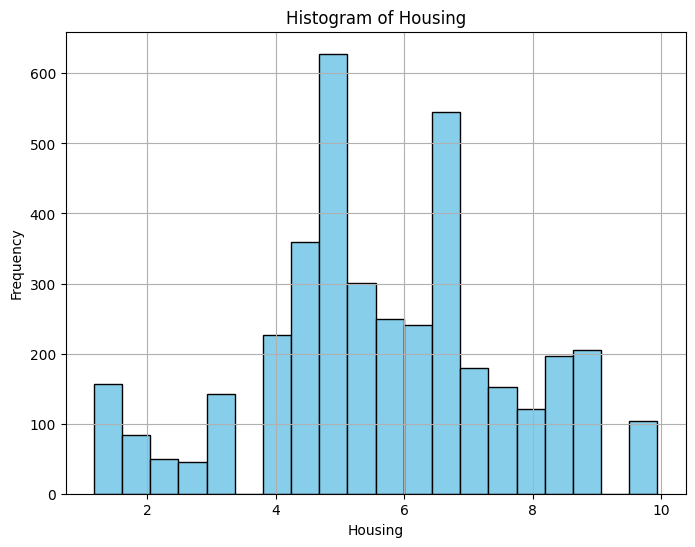

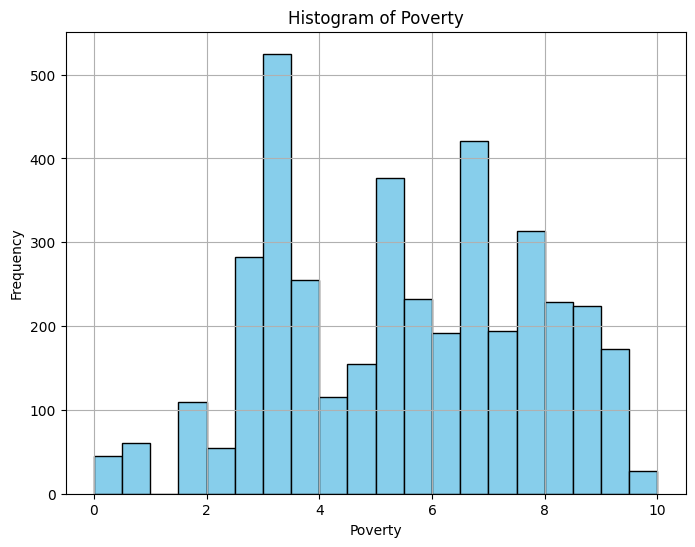

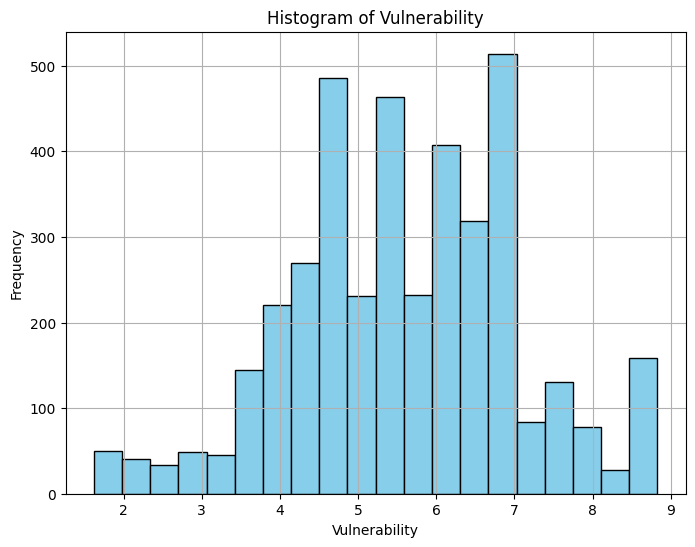

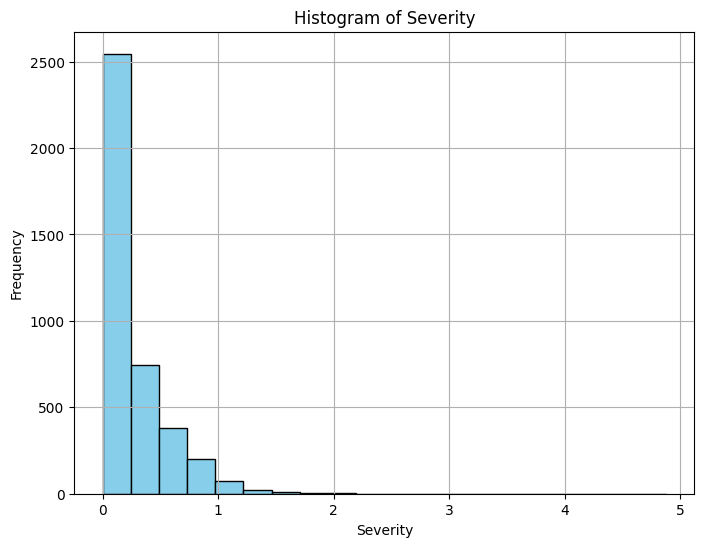

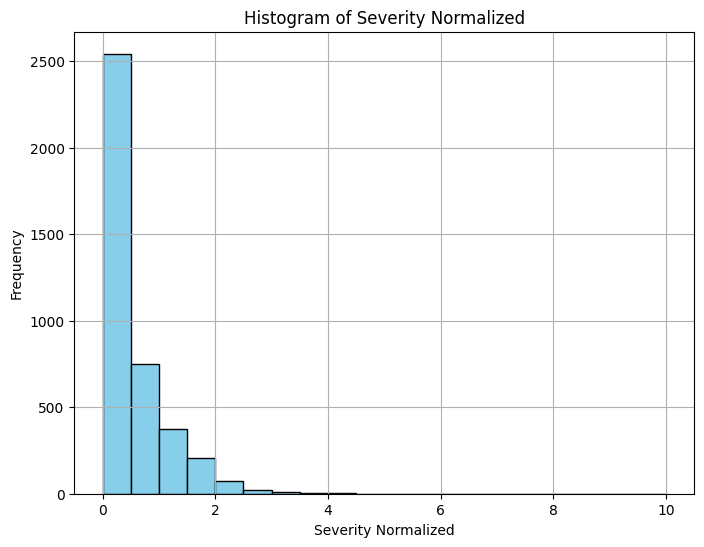

In [6]:
# Memilih kolom yang ingin divisualisasikan sebagai histogram
columns_for_histogram = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', "Severity", "Severity Normalized"]

# Membuat histogram untuk setiap kolom secara terpisah
for column in columns_for_histogram:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

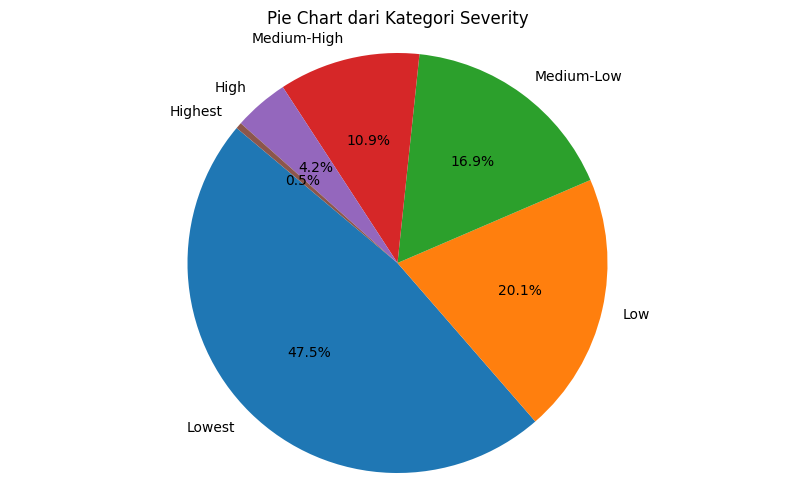

In [7]:
# Menghitung jumlah kemunculan setiap kategori pada kolom 'Severity category'
severity_counts = data['Severity category'].value_counts()

# Membuat pie chart
plt.figure(figsize=(10, 6))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart dari Kategori Severity')
plt.axis('equal')  # Memastikan lingkaran memiliki aspek yang sama
plt.show()

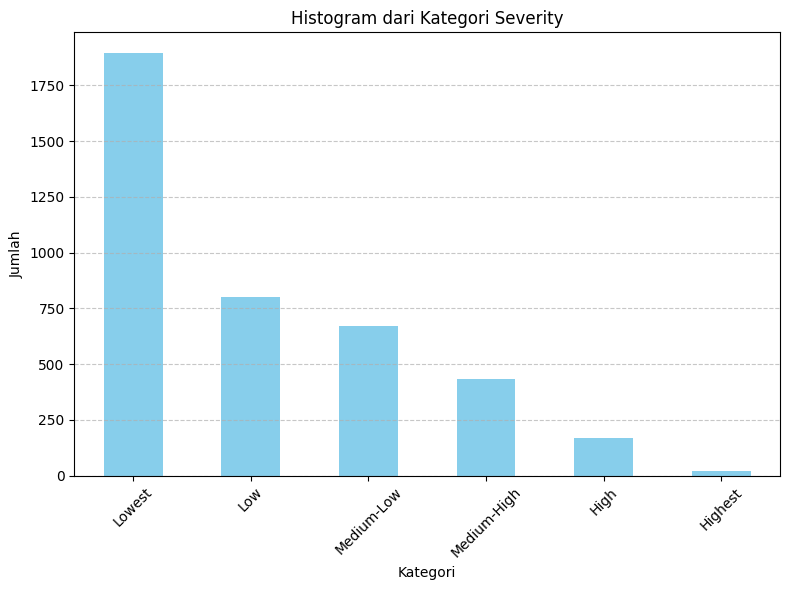

In [8]:
# Membuat histogram
plt.figure(figsize=(8, 6))
data['Severity category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram dari Kategori Severity')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # Mengatur label sumbu x agar lebih mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
plt.show()

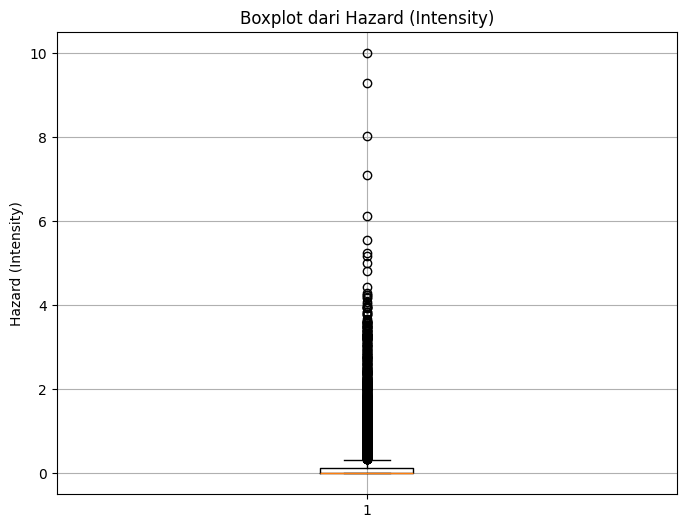

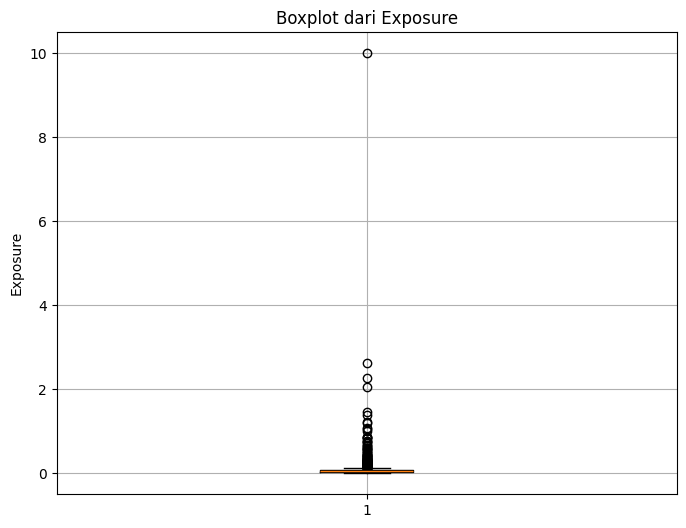

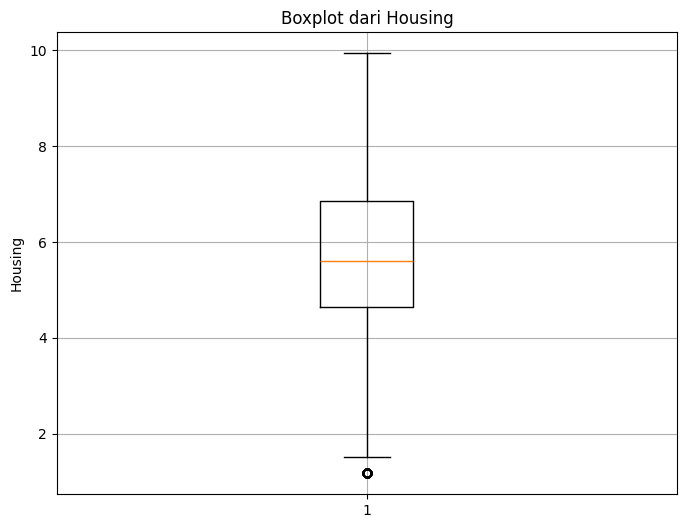

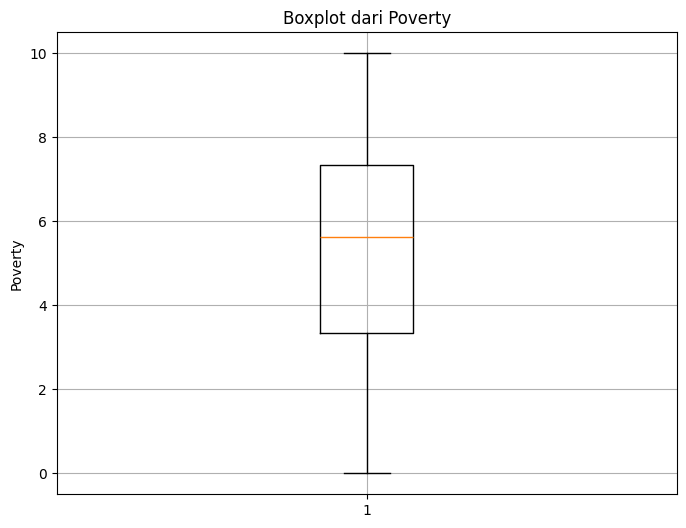

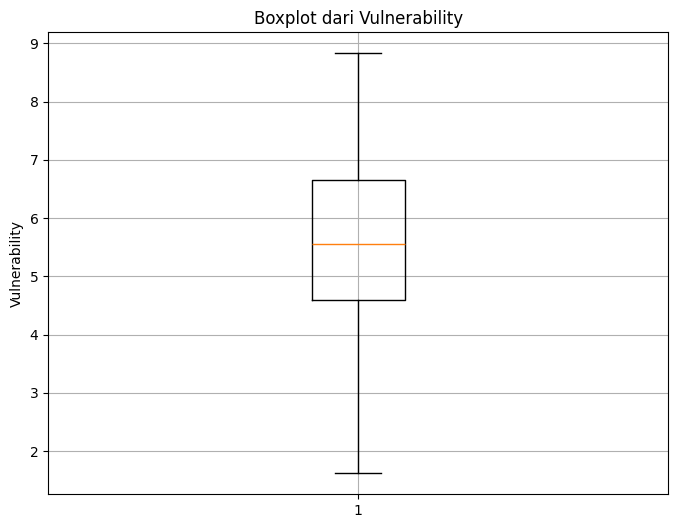

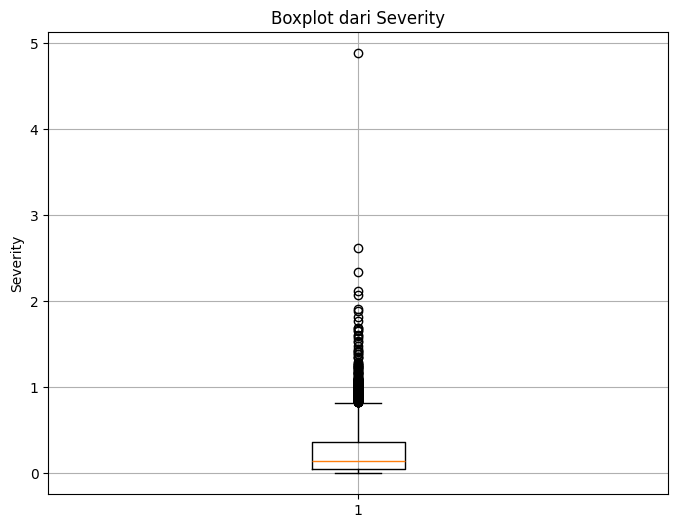

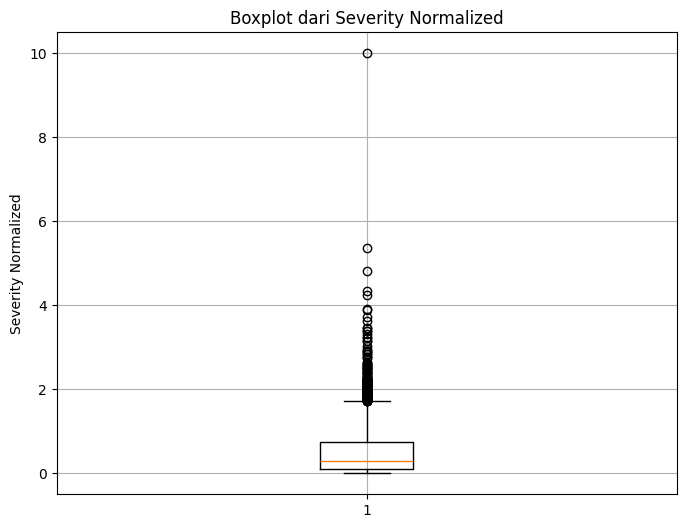

In [9]:
# Memilih kolom yang ingin divisualisasikan sebagai boxplot
columns_for_boxplot = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', "Severity", "Severity Normalized"]

# Membuat boxplot untuk setiap kolom
for column in columns_for_boxplot:
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[column].dropna())  # Menghilangkan nilai NaN sebelum membuat boxplot
    plt.title(f'Boxplot dari {column}')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

## Memeriksa apakah data memiliki outlier atau tidak

In [10]:
# Fungsi untuk mengatasi outlier dengan menghapus data di luar batas IQR untuk kedua atribut
def handle_outlier(data, columns):
    data_filtered = data.copy()
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Menentukan batas bawah dan atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Menghapus outlier
        data_filtered = data_filtered[(data_filtered[column] >= lower_bound) & (data_filtered[column] <= upper_bound)]
    
    return data_filtered

# Menggunakan fungsi untuk mengatasi outlier untuk kedua atribut neighbor dan focal
data_cleaned = handle_outlier(data, ['Hazard (Intensity)', 'Exposure','Housing', 'Poverty', 'Vulnerability', 'Severity','Severity Normalized'])

# Menampilkan DataFrame setelah outlier dihapus
print("DataFrame setelah menghapus outlier:")
data_cleaned

DataFrame setelah menghapus outlier:


,P_CODE,VDC_NAME,DISTRICT,REGION,Hazard (Intensity),Exposure,Housing,Poverty,Vulnerability,Severity,Severity Normalized,Severity category
483,C-JAN-19-011,Basantapur,Sarlahi,Central,0.29,0.13,4.21,8.35,6.28,0.61,1.2559,Medium-High
498,C-JAN-18-041,Laximiniya,Mahottari,Central,0.31,0.11,4.33,8.62,6.48,0.61,1.2436,Medium-High
505,C-JAN-19-005,Babarganj,Sarlahi,Central,0.28,0.12,4.21,8.35,6.28,0.60,1.2345,Medium-High
513,C-JAN-19-048,Kabilasi,Sarlahi,Central,0.28,0.12,4.21,8.35,6.28,0.60,1.2320,Medium-High
521,C-JAN-18-009,Bardibas,Mahottari,Central,0.25,0.13,4.33,8.62,6.48,0.60,1.2227,Medium-High
...,...,...,...,...,...,...,...,...,...,...,...,...
3979,F-SET-68-048,Khaptad National Par,Bajhang,Far-Western,0.00,0.00,8.74,7.05,7.89,0.00,0.0000,Lowest
3980,F-SET-69-076,Khaptad National Par,Achham,Far-Western,0.00,0.00,8.45,9.21,8.83,0.00,0.0000,Lowest
3981,F-SET-70-052,Khaptad National Park,Doti,Far-Western,0.00,0.00,8.77,8.26,8.52,0.00,0.0000,Lowest
3982,M-BHE-58-033,Royal Bardiya Nation,Bardiya,Mid-Western,0.00,0.00,4.64,4.82,4.73,0.00,0.0000,Lowest


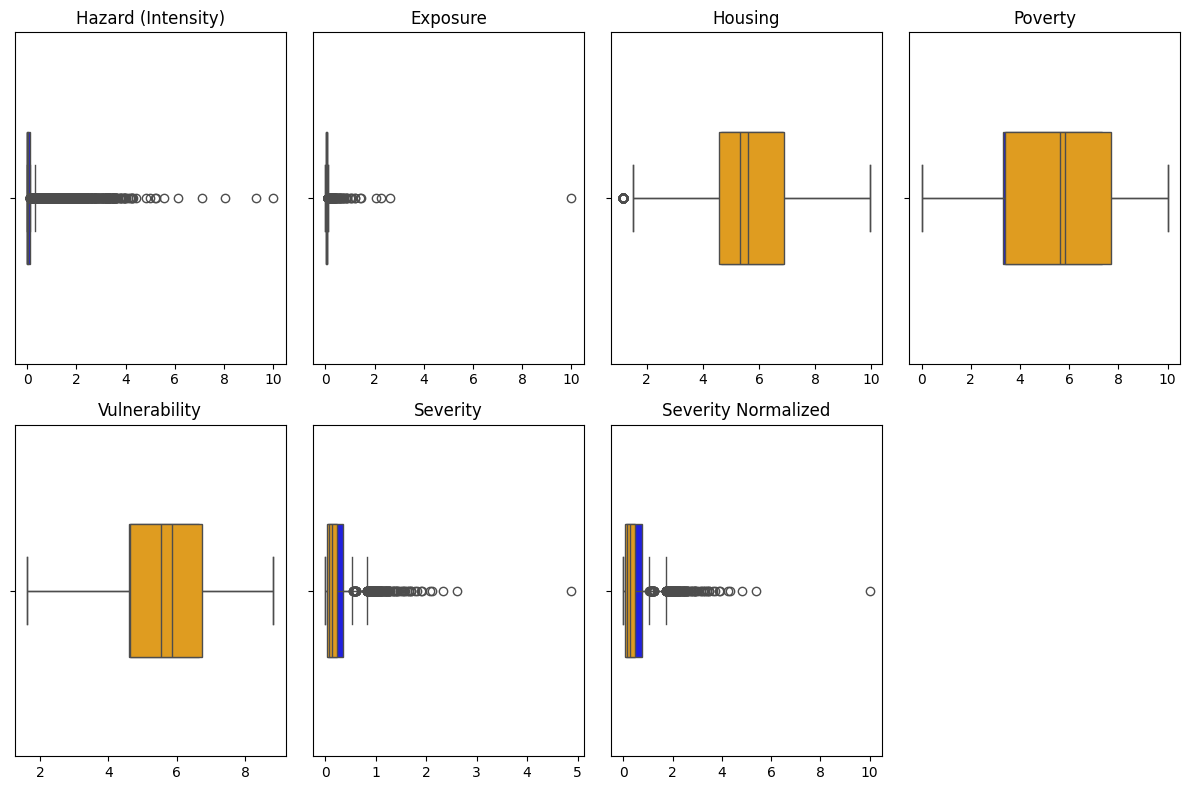

In [11]:
import seaborn as sns

# Mendefinisikan kolom yang ingin divisualisasikan
columns_to_visualize = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity', 'Severity Normalized']

# Membuat subplots
plt.figure(figsize=(12, 8))

# Melakukan plotting boxplot untuk setiap kolom sebelum dan sesudah penghapusan outlier
for column in columns_to_visualize:
    plt.subplot(2, 4, columns_to_visualize.index(column) + 1)
    sns.boxplot(x=data[column], color='blue', width=0.4)
    sns.boxplot(x=data_cleaned[column], color='orange', width=0.4)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [12]:
data.columns

Index(['P_CODE', 'VDC_NAME', 'DISTRICT', 'REGION', 'Hazard (Intensity)',
       'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity',
       'Severity Normalized', 'Severity category'],
      dtype='object')

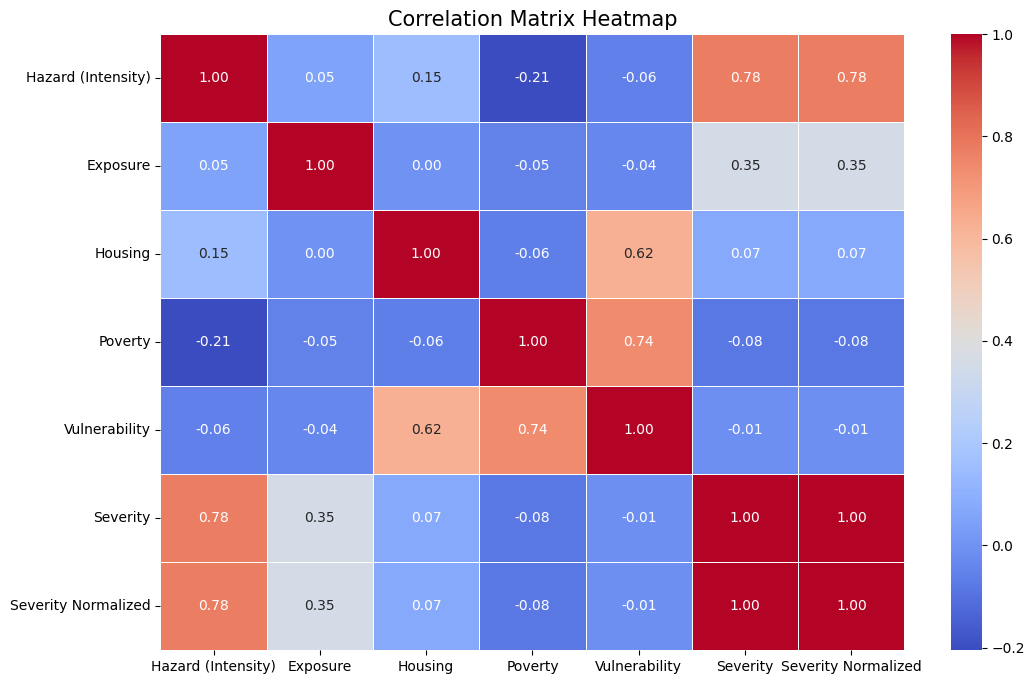

In [13]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

# Set title
plt.title('Correlation Matrix Heatmap', size=15)

# Show the plot
plt.show()

# Transpose Data

In [14]:
import pandas as pd
# Melakukan transposisi DataFrame
data_transposed = data.transpose()

# Menampilkan DataFrame setelah transposisi
data_transposed


,0,1,2,3,4,5,6,7,8,9,...,3975,3976,3977,3978,3979,3980,3981,3982,3983,3984
P_CODE,C-BAG-27-031,C-BAG-25-027,C-NAR-35-005,C-BAG-26-012,C-BAG-27-028,C-BAG-26-003,W-GAN-36-050,C-JAN-20-025,C-JAN-20-026,C-BAG-27-033,...,E-KOS-06-053,E-SAG-15-116,F-MAH-72-021,F-SET-67-028,F-SET-68-048,F-SET-69-076,F-SET-70-052,M-BHE-58-033,W-LUM-48-075,W-LUM-49-072
VDC_NAME,KathmanduN.P.,LalitpurN.P.,BharatpurN. P.,MadhyapurThimiN.P.,Jorpati,BhaktapurN.P.,PrithbinarayanN.P.,KamalamiN.P.,Kapilakot,KirtipurN.P.,...,Koshi Tappu Wildlife,Koshi Tappu Wildlife,Royal Shuklaphanta,Khaptad National Par,Khaptad National Par,Khaptad National Par,Khaptad National Park,Royal Bardiya Nation,Royal Chitawan Natio,Lumbini Development
DISTRICT,Kathmandu,Lalitpur,Chitawan,Bhaktapur,Kathmandu,Bhaktapur,Gorkha,Sindhuli,Sindhuli,Kathmandu,...,Sunsari,Saptari,Kanchanpur,Bajura,Bajhang,Achham,Doti,Bardiya,Nawalparasi,Rupandehi
REGION,Central,Central,Central,Central,Central,Central,Western,Central,Central,Central,...,Eastern,Eastern,Far-Western,Far-Western,Far-Western,Far-Western,Far-Western,Mid-Western,Western,Western
Hazard (Intensity),2.17,1.72,2.21,2.45,1.91,1.82,3.48,2.54,8.02,1.35,...,0.02,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.84,0.02
Exposure,10.0,2.26,1.47,0.85,0.87,0.84,0.33,0.4,0.12,0.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Housing,8.86,8.4,5.38,8.23,8.86,8.23,6.44,5.19,5.19,8.86,...,5.04,1.17,5.46,8.08,8.74,8.45,8.77,4.64,5.61,7.81
Poverty,1.82,0.82,2.53,0.89,1.82,0.89,5.21,6.55,6.55,1.82,...,6.06,6.67,3.08,8.8,7.05,9.21,8.26,4.82,3.51,2.95
Vulnerability,5.34,4.61,3.96,4.56,5.34,4.56,5.83,5.87,5.87,5.34,...,5.55,3.92,4.27,8.44,7.89,8.83,8.52,4.73,4.56,5.38
Severity,4.88,2.62,2.34,2.12,2.07,1.91,1.89,1.82,1.77,1.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Label Encoder
<p> Pada kali ini kami mengurutkan dari low menjadi highest dengan kode low itu 0 dan highest itu 5
</p>

In [15]:
import pandas as pd

# Data contoh dalam bentuk DataFrame
data = pd.DataFrame({
    'Severity category': ['Highest', 'High', 'Medium-Low', 'Medium-High', 'Low', 'Lowest']
})

# Mapping nilai-nilai untuk setiap kategori
mapping = {
    'Lowest': 0,
    'Low': 1,
    'Medium-Low': 2,
    'Medium-High': 3,
    'High': 4,
    'Highest': 5
}

# Melakukan mapping nilai untuk label encoding
data['Severity category Encoded'] = data['Severity category'].map(mapping)

# Mengurutkan DataFrame berdasarkan kolom 'Severity category Encoded'
data_sorted = data.sort_values(by='Severity category Encoded')

# Mencetak hasil label encoding dan pengurutan
print(data_sorted[['Severity category', 'Severity category Encoded']])


  Severity category  Severity category Encoded
5            Lowest                          0
4               Low                          1
2        Medium-Low                          2
3       Medium-High                          3
1              High                          4
0           Highest                          5


# Robust Scalling (Feature Scalling)

Disini kami hanya memakai Standar Scaler untuk fitur scalling 

In [16]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Membaca data dari CSV
data = pd.read_csv("nepal-earthquake-severity-index-latest (1).csv")

# Inisialisasi RobustScaler
scaler = RobustScaler()

# Memilih kolom numerik untuk di-scale
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Scaling kolom-kolom numerik
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Melihat hasil scaling
print(data)


            P_CODE               VDC_NAME     DISTRICT       REGION  \
0     C-BAG-27-031          KathmanduN.P.    Kathmandu      Central   
1     C-BAG-25-027           LalitpurN.P.     Lalitpur      Central   
2     C-NAR-35-005         BharatpurN. P.     Chitawan      Central   
3     C-BAG-26-012     MadhyapurThimiN.P.    Bhaktapur      Central   
4     C-BAG-27-028                Jorpati    Kathmandu      Central   
...            ...                    ...          ...          ...   
3980  F-SET-69-076   Khaptad National Par       Achham  Far-Western   
3981  F-SET-70-052  Khaptad National Park         Doti  Far-Western   
3982  M-BHE-58-033   Royal Bardiya Nation      Bardiya  Mid-Western   
3983  W-LUM-48-075   Royal Chitawan Natio  Nawalparasi      Western   
3984  W-LUM-49-072    Lumbini Development    Rupandehi      Western   

      Hazard (Intensity)  Exposure   Housing   Poverty  Vulnerability  \
0              16.615385    248.75  1.470588 -0.945274      -0.101449   
1

## Membagi data menjadi Training dan Testing

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Memisahkan fitur dan target
features = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity', 'Severity Normalized']
X = data[features]
y = data['Severity category']

In [18]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Inisialisasi model Decision Tree
model = DecisionTreeClassifier()

# Melatih model Decision Tree dengan data latih
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
# Memprediksi data uji
y_pred = model.predict(X_test)

In [21]:
# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        40
     Highest       1.00      1.00      1.00         5
         Low       1.00      1.00      1.00       164
      Lowest       1.00      1.00      1.00       354
 Medium-High       1.00      1.00      1.00        99
  Medium-Low       1.00      1.00      1.00       135

    accuracy                           1.00       797
   macro avg       1.00      1.00      1.00       797
weighted avg       1.00      1.00      1.00       797

Confusion Matrix:


[[ 40   0   0   0   0   0]
 [  0   5   0   0   0   0]
 [  0   0 164   0   0   0]
 [  0   0   0 354   0   0]
 [  0   0   0   0  99   0]
 [  0   0   0   0   0 135]]


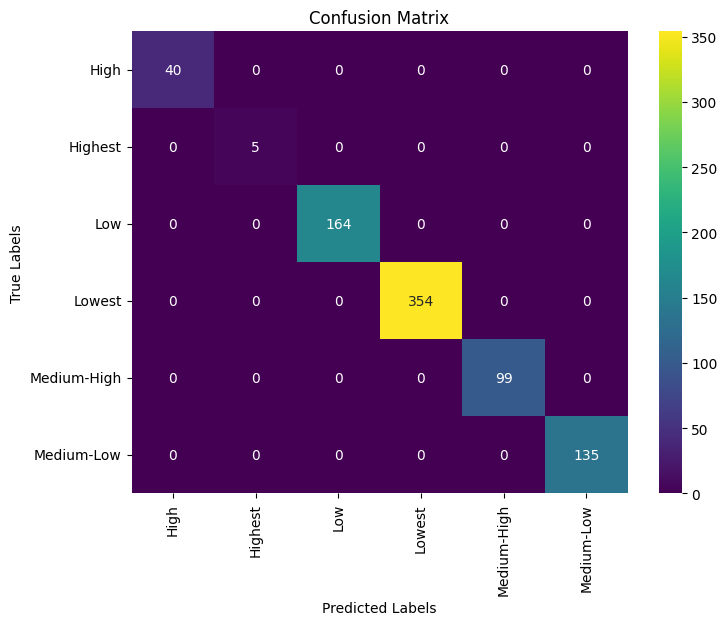

In [22]:
conf_mat = confusion_matrix(y_test, y_pred)

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# ANN

In [55]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import numpy as np

# Data preparation
features = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity', 'Severity Normalized']
X = data[features]
y = data['Severity category']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model initialization
model = Sequential()

# Add input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add hidden layers
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.1))  # Increased dropout
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.1))

# Add output layer
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

# Compile model with optimized parameters
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

# Train model with Early Stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.05, callbacks=[early_stopping])

# Evaluate model performance
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict labels for test data
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
213/213 [==============================] - 9s 15ms/step - loss: 0.4324 - accuracy: 0.8415 - val_loss: 0.2057 - val_accuracy: 0.9389
Epoch 2/100
213/213 [==============================] - 3s 15ms/step - loss: 0.2747 - accuracy: 0.9016 - val_loss: 0.1871 - val_accuracy: 0.9278
Epoch 3/100
213/213 [==============================] - 2s 9ms/step - loss: 0.2551 - accuracy: 0.9055 - val_loss: 0.1917 - val_accuracy: 0.9333
Epoch 4/100
213/213 [==============================] - 2s 10ms/step - loss: 0.1769 - accuracy: 0.9410 - val_loss: 0.1221 - val_accuracy: 0.9444
Epoch 5/100
213/213 [==============================] - 2s 9ms/step - loss: 0.1478 - accuracy: 0.9460 - val_loss: 0.0695 - val_accuracy: 0.9667
Epoch 6/100
213/213 [==============================] - 2s 9ms/step - loss: 0.1671 - accuracy: 0.9419 - val_loss: 0.1185 - val_accuracy: 0.9611
Epoch 7/100
213/213 [==============================] - 2s 8ms/step - loss: 0.1517 - accuracy: 0.9413 - val_loss: 0.0891 - val_accuracy: 0.9

# ANN

25/25 [==============================] - 1s 19ms/step

Confusion Matrix:
 [[ 35   1   0   0   4   0]
 [  4   1   0   0   0   0]
 [  0   0 164   0   0   0]
 [  0   0   1 353   0   0]
 [  6   0   0   0  90   3]
 [  0   0   3   0   0 132]]


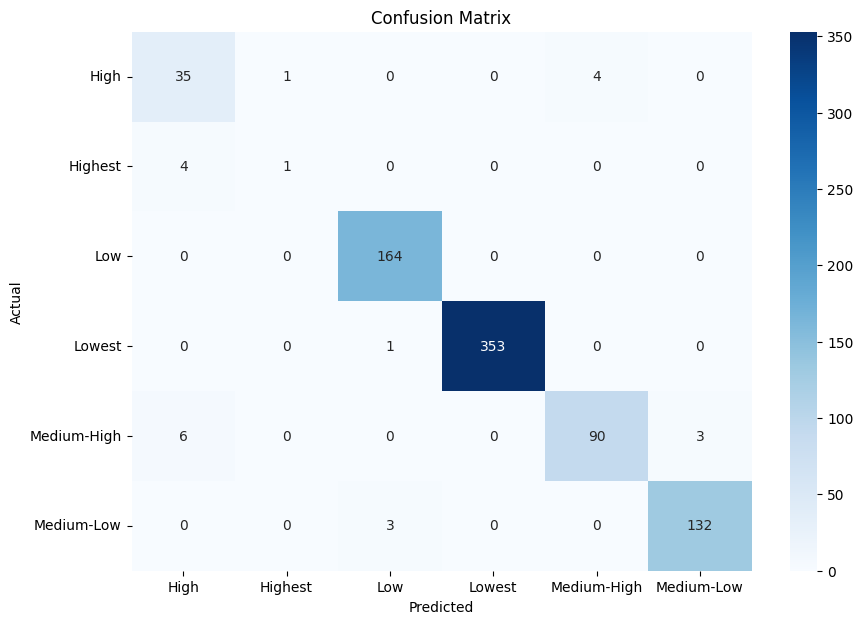

In [45]:
# Prediksi pada data uji
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [46]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


Classification Report:
               precision    recall  f1-score   support

        High       0.78      0.88      0.82        40
     Highest       0.50      0.20      0.29         5
         Low       0.98      1.00      0.99       164
      Lowest       1.00      1.00      1.00       354
 Medium-High       0.96      0.91      0.93        99
  Medium-Low       0.98      0.98      0.98       135

    accuracy                           0.97       797
   macro avg       0.86      0.83      0.83       797
weighted avg       0.97      0.97      0.97       797



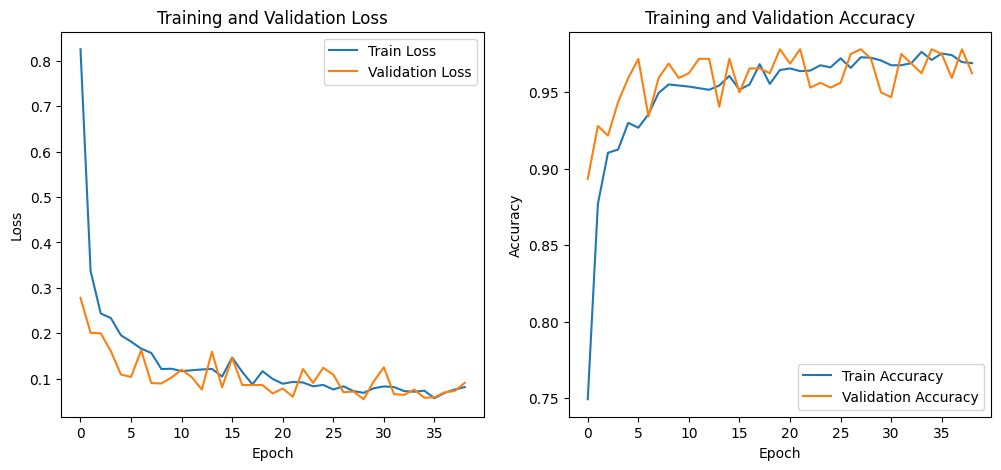

In [47]:
# Visualisasi Loss dan Accuracy
# Mendapatkan nilai loss dan akurasi dari history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


# -------------------------------------------------------------

In [ ]:
# Mengambil hanya data numerik dari DataFrame
numerical_data = data_cleaned[['Hazard (Intensity)', 'Exposure','Severity','Severity Normalized']]

# Menghitung korelasi antar kolom-kolom numerik
correlation_matrix = numerical_data.corr()

# Menampilkan matriks korelasi
print("Matriks Korelasi:")
print(correlation_matrix)
 

# Klasterisasi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Membaca data
data = pd.read_csv("nepal-earthquake-severity-index-latest (1).csv")

# Mengambil fitur yang akan digunakan untuk klastering
X = data.iloc[:, 4:9].values

# Menghitung SSE untuk nilai k dari 1 hingga 10
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Menghitung WSS untuk nilai k dari 1 hingga 10
wss = [sse[0] - ss for ss in sse]

# Menghitung selisih SSE dan WSS
difference = [abs(wss[i] - sse[i]) for i in range(len(wss))]

# Plot SSE dan WSS serta selisihnya
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sse, marker='o', label='SSE')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE/WSS/Difference')
plt.title('Elbow Method')
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)

# Menentukan elbow point (di sini digunakan nilai minimum selisih)
elbow_point = difference.index(min(difference)) + 1

# Menambahkan label pada elbow point
plt.annotate('Optimal K',
             xy=(elbow_point, sse[elbow_point - 1]),
             xytext=(elbow_point + 1, sse[elbow_point - 1] + 200),  # Atur posisi teks
             arrowprops=dict(facecolor='black', arrowstyle='->'))   # Tambahkan panah

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler

# Membaca data
data = pd.read_csv("nepal-earthquake-severity-index-latest (1).csv")

# Memilih fitur yang akan digunakan untuk klastering
X = data[['Hazard (Intensity)', 'Severity', 'Severity Normalized']]

# Standarisasi data
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Menghitung SSE untuk nilai k dari 1 hingga 10
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE untuk menemukan elbow point
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Determining Number of Clusters')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

optimal_k = 3

# Inisialisasi model K-Means dengan jumlah klaster yang optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)  # optimal_k diganti dengan jumlah klaster yang telah ditentukan

# Melakukan klasterisasi pada data
kmeans.fit(X_scaled)  # X_scaled adalah data yang sudah discaling

# Mendapatkan label klaster untuk setiap data poin
cluster_labels = kmeans.labels_

# Mendapatkan pusat klaster
cluster_centers = kmeans.cluster_centers_


In [ ]:
import matplotlib.pyplot as plt

# Plot scatter plot dari dua fitur dengan warna berdasarkan label klaster
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)  # Menampilkan pusat klaster
plt.xlabel('Hazard (Intensity) Scaled')
plt.ylabel('Severity Scaled')
plt.title('Clustering of Data Points')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# Plot scatter plot dari dua fitur dengan warna berdasarkan label klaster
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)

# Plot pusat klaster
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)  

# Tambahkan garis panjang pada centroid
for i, center in enumerate(cluster_centers):
    # Hitung jarak Euclidean dari setiap titik dalam klaster ke pusat klaster
    distances = euclidean_distances(X_scaled[cluster_labels == i], [center])
    # Dapatkan titik terjauh dalam klaster dari pusat klaster
    max_distance_point = X_scaled[cluster_labels == i][np.argmax(distances)]
    # Plot garis vektor dari pusat klaster ke titik terjauh dalam klaster
    plt.plot([center[0], max_distance_point[0]], [center[1], max_distance_point[1]], c='black', linestyle='--')

plt.xlabel('Hazard (Intensity) Scaled')
plt.ylabel('Severity Scaled')
plt.title('Clustering of Data Points with Centroid Lines')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Hitung nilai Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Hitung nilai Davies-Bouldin Index
davies_bouldin_idx = davies_bouldin_score(X_scaled, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin_idx)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4c308968-6a01-461a-99a4-5c527286ebca' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>